In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt

# Load Data

In [2]:
from utils import load_review_data, load_product_data

D:\ApplicationDev\anaconda3\envs\rag\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
review_df_raw = load_review_data()
product_df_raw = load_product_data()

Loading review data...
Loading product data...


In [4]:
REVIEW_COLUMNS = [
    'author_id', 'rating', 'submission_time', 'review_text',
    'skin_tone', 'eye_color', 'skin_type', 'hair_color',
    'product_id', 
]
PRODUCT_COLUMNS = [
    'product_id', 'product_name', 'brand_name', 'loves_count',
    'rating', 'reviews', 'size', 'ingredients', 'price_usd',
    'primary_category', 'secondary_category', 'tertiary_category'
]

In [5]:
review_df = review_df_raw[REVIEW_COLUMNS].copy()
review_df["author_id"] = review_df["author_id"].astype(str)
review_df['submission_time'] = pd.to_datetime(review_df['submission_time'])
review_df['year'] = review_df['submission_time'].dt.year
review_df['month'] = review_df['submission_time'].dt.month
review_df['review_text_len'] = review_df['review_text'].astype(str).str.len()

review_df.head()

,author_id,rating,submission_time,review_text,skin_tone,eye_color,skin_type,hair_color,product_id,year,month,review_text_len
0,1741593524,5,2023-02-01,I use this with the Nudestix “Citrus Clean Bal...,NaN,brown,dry,black,P504322,2023,2,455
1,31423088263,1,2023-03-21,I bought this lip mask after reading the revie...,NaN,NaN,NaN,NaN,P420652,2023,3,162
2,5061282401,5,2023-03-21,My review title says it all! I get so excited ...,light,brown,dry,blonde,P420652,2023,3,272
3,6083038851,5,2023-03-20,I’ve always loved this formula for a long time...,NaN,brown,combination,black,P420652,2023,3,230
4,47056667835,5,2023-03-20,"If you have dry cracked lips, this is a must h...",light,hazel,combination,NaN,P420652,2023,3,213


In [6]:
product_df = product_df_raw[PRODUCT_COLUMNS].copy()
product_df.head()

,product_id,product_name,brand_name,loves_count,rating,reviews,size,ingredients,price_usd,primary_category,secondary_category,tertiary_category
0,P473671,Fragrance Discovery Set,19-69,6320,3.6364,11.0,NaN,"['Capri Eau de Parfum:', 'Alcohol Denat. (SD A...",35.0,Fragrance,Value & Gift Sets,Perfume Gift Sets
1,P473668,La Habana Eau de Parfum,19-69,3827,4.1538,13.0,3.4 oz/ 100 mL,"['Alcohol Denat. (SD Alcohol 39C), Parfum (Fra...",195.0,Fragrance,Women,Perfume
2,P473662,Rainbow Bar Eau de Parfum,19-69,3253,4.2500,16.0,3.4 oz/ 100 mL,"['Alcohol Denat. (SD Alcohol 39C), Parfum (Fra...",195.0,Fragrance,Women,Perfume
3,P473660,Kasbah Eau de Parfum,19-69,3018,4.4762,21.0,3.4 oz/ 100 mL,"['Alcohol Denat. (SD Alcohol 39C), Parfum (Fra...",195.0,Fragrance,Women,Perfume
4,P473658,Purple Haze Eau de Parfum,19-69,2691,3.2308,13.0,3.4 oz/ 100 mL,"['Alcohol Denat. (SD Alcohol 39C), Parfum (Fra...",195.0,Fragrance,Women,Perfume


# EDA

In [7]:
def analyze_df(df):
    # display(df.head())
    display(df.sample(n=5, random_state=42))

    print("\n-- shape --\n")
    print(df.shape)

    print("\n-- data type --\n")
    print(df.dtypes)

    print("\n-- unique values count --\n")
    print(df.nunique())

    print("\n-- NaN values count --\n")
    print(df.isna().sum())

    print("\n-- description --\n")
    print(df.describe())

In [8]:
analyze_df(review_df)

,author_id,rating,submission_time,review_text,skin_tone,eye_color,skin_type,hair_color,product_id,year,month,review_text_len
1049894,5839472814,5,2022-08-14,"I have really sensitive skin, and this is the ...",fairLight,brown,combination,brown,P405944,2022,8,505
619554,30632543234,5,2021-03-06,"Lightweight, smells amazing! It worked great u...",light,hazel,normal,brown,P455618,2021,3,79
634782,1212678959,5,2020-04-27,I don’t know how anyone could not like this ma...,light,hazel,combination,brown,P433522,2020,4,344
706815,32052969220,5,2021-06-01,I’m in love with this product. My skin looks g...,fair,blue,combination,black,P375853,2021,6,51
731656,1135020217,5,2018-09-29,I got samples of this cleasner from Sunday Ril...,light,blue,combination,brown,P309310,2018,9,256



-- shape --

(1094411, 12)

-- data type --

author_id                  object
rating                      int64
submission_time    datetime64[ns]
review_text                object
skin_tone                  object
eye_color                  object
skin_type                  object
hair_color                 object
product_id                 object
year                        int32
month                       int32
review_text_len             int64
dtype: object

-- unique values count --

author_id          503216
rating                  5
submission_time      5317
review_text        969419
skin_tone              14
eye_color               6
skin_type               4
hair_color              7
product_id           2351
year                   16
month                  12
review_text_len      2188
dtype: int64

-- NaN values count --

author_id               0
rating                  0
submission_time         0
review_text          1444
skin_tone          170539
eye_color          20962

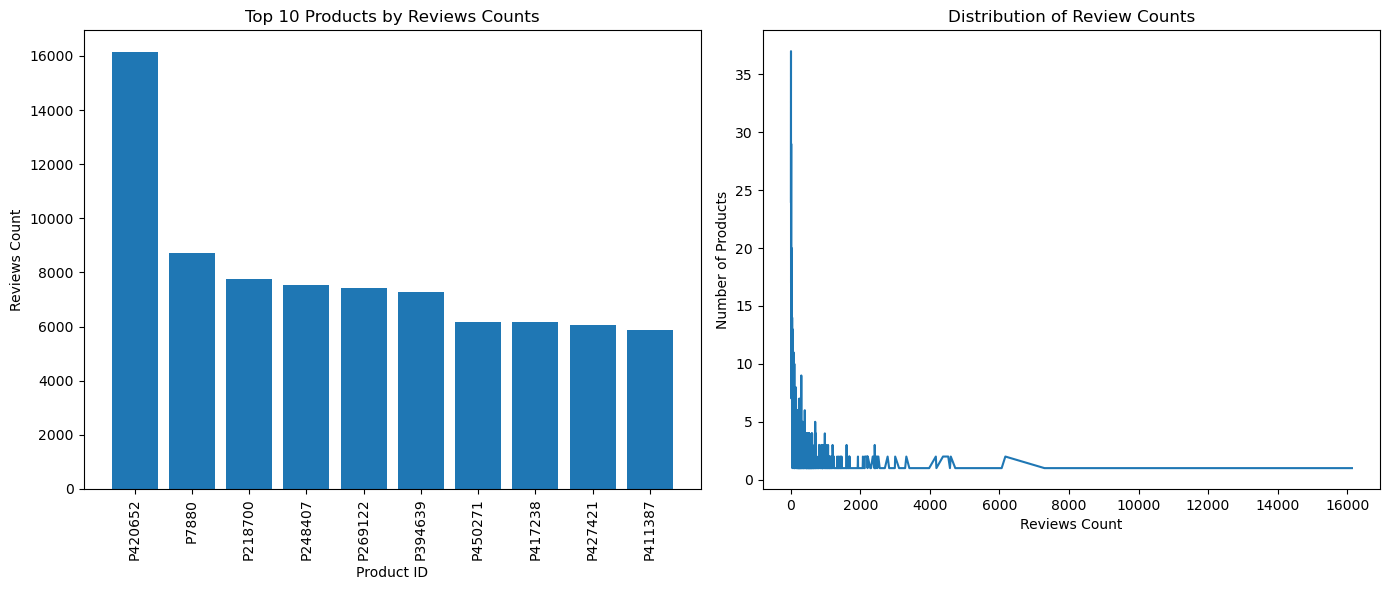

In [9]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

product_review_counts = review_df['product_id'].value_counts()
product_review_counts_10 = product_review_counts.head(10)

axes[0].bar(product_review_counts_10.index, product_review_counts_10.values)
axes[0].set_title("Top 10 Products by Reviews Counts")
axes[0].set_xlabel("Product ID")
axes[0].tick_params(axis='x', labelrotation=90) 
axes[0].set_ylabel("Reviews Count")

review_count_distribution = product_review_counts.value_counts().sort_index()
axes[1].plot(review_count_distribution.index, review_count_distribution.values)
axes[1].set_title("Distribution of Review Counts")
axes[1].set_xlabel("Reviews Count")
axes[1].set_ylabel("Number of Products")

plt.tight_layout()
plt.show()

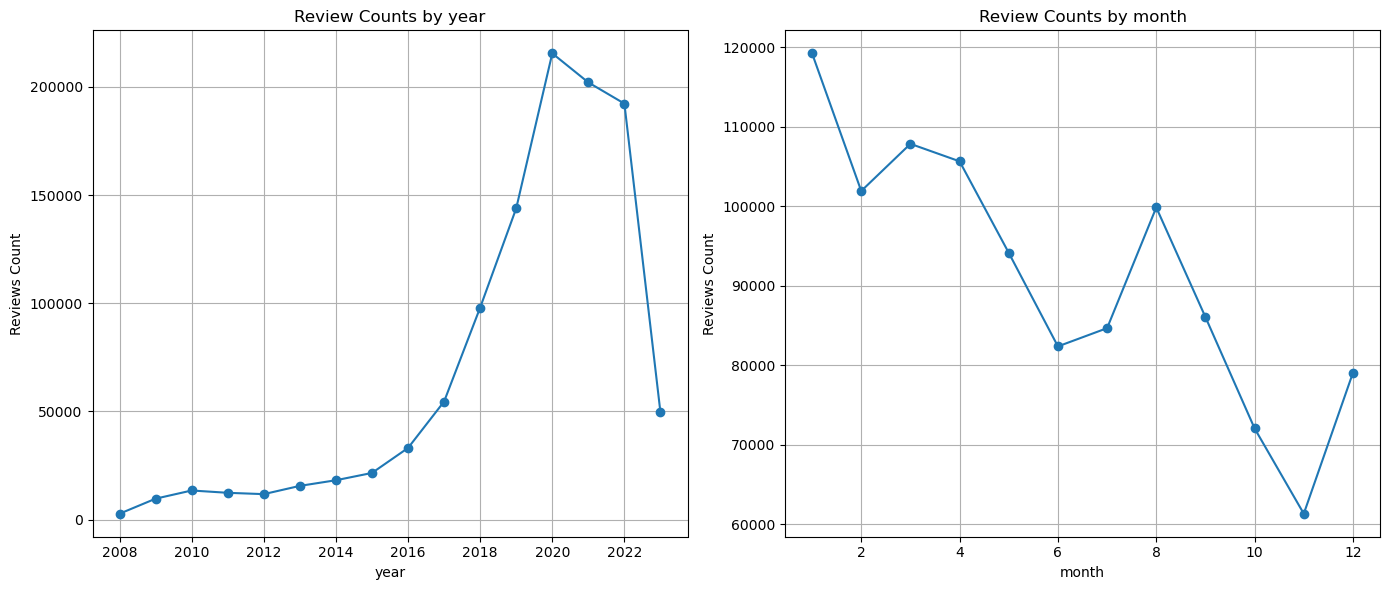

In [10]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

for i, field in enumerate(["year", "month"]):
    value_counts = review_df[field].value_counts().sort_index()
    axes[i].plot(value_counts.index, value_counts.values, marker='o')
    axes[i].set_title(f"Review Counts by {field}")
    axes[i].set_xlabel(f"{field}")
    axes[i].set_ylabel("Reviews Count")
    axes[i].grid(True)

plt.tight_layout()
plt.show()

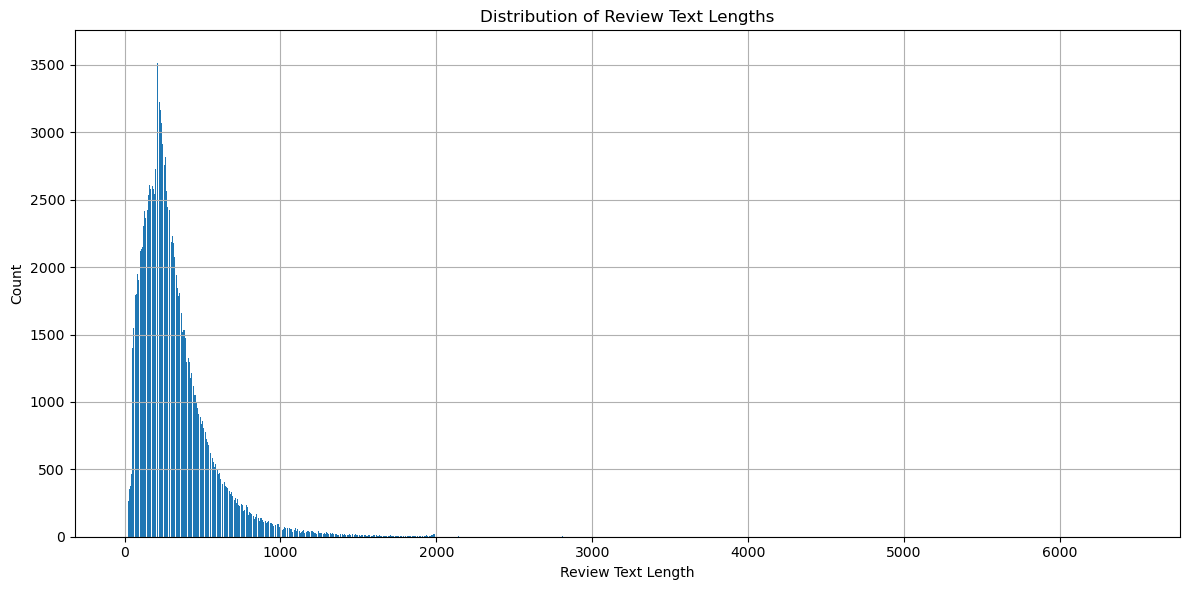

In [11]:
length_counts = review_df['review_text_len'].value_counts().sort_index()
plt.figure(figsize=(12, 6))
plt.bar(length_counts.index, length_counts.values)
plt.xlabel('Review Text Length')
plt.ylabel('Count')
plt.title('Distribution of Review Text Lengths')
plt.grid(True)
plt.tight_layout()
plt.show()

In [12]:
analyze_df(product_df)

,product_id,product_name,brand_name,loves_count,rating,reviews,size,ingredients,price_usd,primary_category,secondary_category,tertiary_category
8220,P448733,"Hydrating Recovery Shampoo for Dry, Damaged & ...",Virtue,7785,4.1830,153.0,8 oz/ 240 mL,NaN,40.0,Hair,Shampoo & Conditioner,Shampoo
4552,P476419,Aglow Golden Priming Oil,lilah b.,4902,4.6207,58.0,1 oz / 30 mL,"['Prunus Amygdalus Dulcis (Sweet Almond) Oil, ...",68.0,Makeup,Face,Face Primer
1535,P456992,Superdefense SPF 25 Fatigue + 1st Signs of Age...,CLINIQUE,3096,3.8824,17.0,1.7 oz/ 50 mL,"['Water\\Aqua\\Eau, Ethylhexyl Salicylate, Hom...",56.0,Skincare,Moisturizers,Moisturizers
4228,P441884,Tinted Face Oil Comfy Skin Tint,Kosas,112124,3.6687,1781.0,1.0 oz/ 30 mL,"['Coco-Caprylate/Caprate, Octyldodecanol, Simm...",42.0,Makeup,Face,Foundation
5623,P482709,Cheek Clapper 3D Blush Trio Palette,ONE/SIZE by Patrick Starrr,95820,4.7403,335.0,NaN,NaN,38.0,Makeup,Cheek,Blush



-- shape --

(8494, 12)

-- data type --

product_id             object
product_name           object
brand_name             object
loves_count             int64
rating                float64
reviews               float64
size                   object
ingredients            object
price_usd             float64
primary_category       object
secondary_category     object
tertiary_category      object
dtype: object

-- unique values count --

product_id            8494
product_name          8415
brand_name             304
loves_count           7436
rating                4394
reviews               1556
size                  2055
ingredients           6538
price_usd              298
primary_category         9
secondary_category      41
tertiary_category      118
dtype: int64

-- NaN values count --

product_id               0
product_name             0
brand_name               0
loves_count              0
rating                 278
reviews                278
size                  1631
ingr

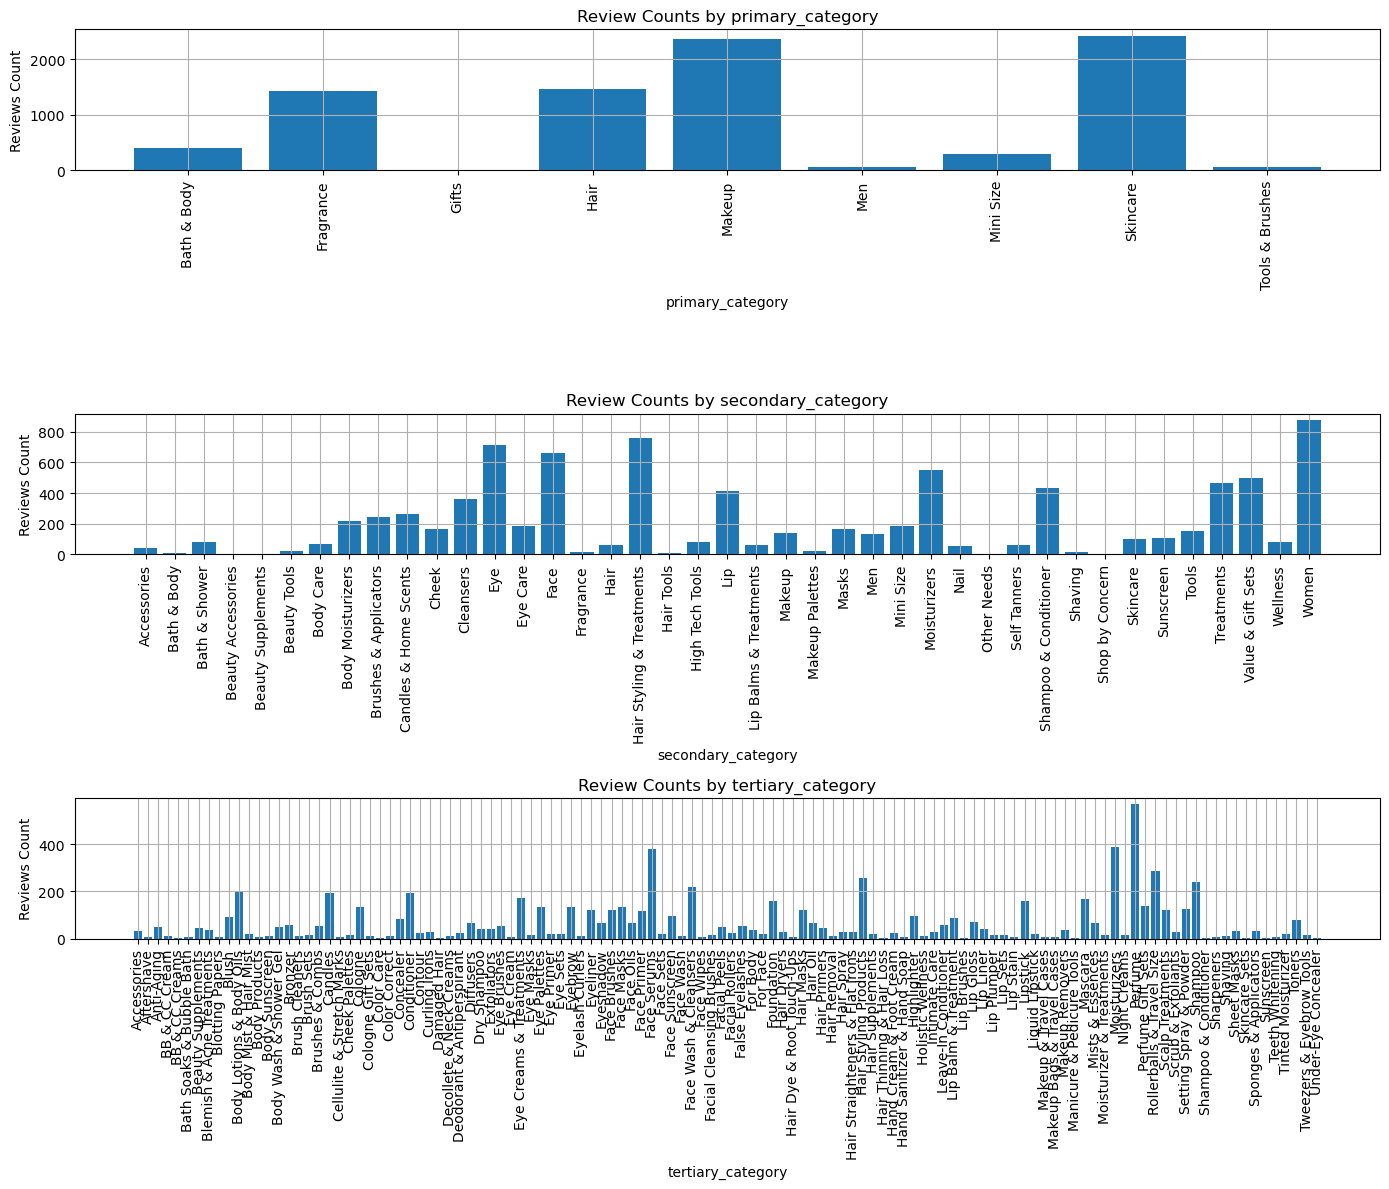

In [13]:
fig, axes = plt.subplots(3, 1, figsize=(14, 12))

for i, field in enumerate(["primary_category", "secondary_category", "tertiary_category"]):
    value_counts = product_df[field].value_counts().sort_index()
    axes[i].bar(value_counts.index, value_counts.values)
    axes[i].set_title(f"Review Counts by {field}")
    axes[i].set_xlabel(f"{field}")
    axes[i].tick_params(axis='x', labelrotation=90) 
    axes[i].set_ylabel("Reviews Count")
    axes[i].grid(True)

plt.tight_layout()
plt.show()

# Filter

1. Drop rows where the values are missing.
2. Drop rows where 'review_text' is too short or too long.
3. Drop rows where 'submission_time' is after 2023.
4. Clean text in 'review_text'

In [14]:
import emoji


MIN_TEXT_LEN = 50
MAX_TEXT_LEN = 2000

def filter_review(review_df_raw):
    review_df = review_df_raw.copy()
    review_df = review_df.dropna()  
    review_df = review_df[review_df['review_text_len'] >= MIN_TEXT_LEN & (review_df['review_text_len'] < MAX_TEXT_LEN)]
    review_df = review_df[review_df['year'] >= 2023]
    review_df = review_df[REVIEW_COLUMNS]    
    return review_df


def clean_text(text):
    text = emoji.replace_emoji(text, replace='')
    return text


review_df_filterd = filter_review(review_df)
review_df_filterd['review_text'] = review_df_filterd['review_text'].apply(clean_text)
review_df_filterd = review_df_filterd.drop_duplicates(subset=['review_text'])
analyze_df(review_df_filterd)

,author_id,rating,submission_time,review_text,skin_tone,eye_color,skin_type,hair_color,product_id
638516,32188454162,5,2023-01-26,I love this serum! I put it on my face before ...,light,blue,combination,blonde,P440494
393852,30391437473,5,2023-02-02,Mix with your moisturizer to be lighter. Don’t...,light,hazel,normal,blonde,P432668
393782,32394665163,3,2023-03-01,Overrated but cute packaging lol. It didn’t do...,tan,brown,dry,black,P432668
430529,10832593079,1,2023-02-07,First PTR product that i don’t like. I have co...,fair,gray,combination,blonde,P415701
1051760,47310552245,5,2023-03-09,I was stunning from how beautiful the bottle i...,fair,brown,dry,black,P503992



-- shape --

(21278, 9)

-- data type --

author_id                  object
rating                      int64
submission_time    datetime64[ns]
review_text                object
skin_tone                  object
eye_color                  object
skin_type                  object
hair_color                 object
product_id                 object
dtype: object

-- unique values count --

author_id          13272
rating                 5
submission_time       74
review_text        21278
skin_tone             14
eye_color              6
skin_type              4
hair_color             7
product_id          1545
dtype: int64

-- NaN values count --

author_id          0
rating             0
submission_time    0
review_text        0
skin_tone          0
eye_color          0
skin_type          0
hair_color         0
product_id         0
dtype: int64

-- description --

             rating                submission_time
count  21278.000000                          21278
mean       4.173278  2

In [15]:
product_df_filtered = product_df[product_df['product_id'].isin(review_df_filterd['product_id'])]
analyze_df(product_df_filtered)

,product_id,product_name,brand_name,loves_count,rating,reviews,size,ingredients,price_usd,primary_category,secondary_category,tertiary_category
7935,P475201,24-7 Power Swipe Hydrating Day & Night Treatme...,TULA Skincare,7302,4.2595,185.0,0.22 oz/ 6.5 mL,"['Squalane, Hydrogenated Polyisobutene, Isoamy...",38.0,Skincare,Eye Care,Eye Creams & Treatments
2957,P482535,Strawberry Smooth BHA + AHA Salicylic Acid Serum,Glow Recipe,118258,4.5439,1024.0,NaN,"['Water/Aqua/Eau, Methylpropanediol, C9-12 Alk...",42.0,Skincare,Treatments,Face Serums
7176,P469537,Bestsellers Trial Kit,Sulwhasoo,26274,4.7020,302.0,NaN,"['First Care Activating Serum:', 'Water/Aqua/E...",58.0,Skincare,Value & Gift Sets,NaN
2939,P504780,Super Glow Vitamin C Brightening Face Serum,Glossier,8275,2.7778,9.0,1 oz / 30 mL,"['Water/Aqua/Eau, Magnesium Ascorbyl Phosphate...",29.0,Skincare,Treatments,Face Serums
6380,P397465,Strawberry Lip Balm,Rosebud Perfume Co.,13002,4.1518,112.0,0.5 oz/ 14.2 g,"['Pertolatum, Lanolin Alcohol, Synthetic Wax, ...",8.0,Skincare,Lip Balms & Treatments,NaN



-- shape --

(1545, 12)

-- data type --

product_id             object
product_name           object
brand_name             object
loves_count             int64
rating                float64
reviews               float64
size                   object
ingredients            object
price_usd             float64
primary_category       object
secondary_category     object
tertiary_category      object
dtype: object

-- unique values count --

product_id            1545
product_name          1540
brand_name             132
loves_count           1527
rating                1280
reviews                793
size                   383
ingredients           1421
price_usd              183
primary_category         1
secondary_category      12
tertiary_category       30
dtype: int64

-- NaN values count --

product_id              0
product_name            0
brand_name              0
loves_count             0
rating                  0
reviews                 0
size                  207
ingredients

In [16]:
review_df_filterd.to_csv('data/review.csv', index=False)
product_df.to_csv('data/product.csv', index=False)